In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [8]:
df = pd.read_csv("customer_churn_data.csv")
print("Shape:", df.shape)
df.head()

Shape: (10000, 24)


customer_id  age  gender  senior_citizen partner dependents  tenure  \
0  CUST_000001   52    Male               0     Yes        Yes       7   
1  CUST_000002   42    Male               0     Yes         No      32   
2  CUST_000003   54    Male               0      No        Yes      12   
3  CUST_000004   67    Male               1      No         No       3   
4  CUST_000005   41  Female               0     Yes         No       7   

  phone_service multiple_lines internet_service  ...         streaming_tv  \
0           Yes             No      Fiber optic  ...                  Yes   
1           Yes             No               No  ...  No internet service   
2           Yes            Yes      Fiber optic  ...                  Yes   
3           Yes             No              DSL  ...                   No   
4           Yes             No      Fiber optic  ...                   No   

      streaming_movies        contract paperless_billing  \
0                   No        One year               Yes   
1  No internet service        One year               Yes   
2                  Yes  Month-to-month                No   
3                   No        One year                No   
4                   No  Month-to-month               Yes   

              payment_method monthly_charges total_charges  \
0           Electronic check           39.18        294.66   
1           Electronic check           40.36       1286.75   
2  Bank transfer (automatic)           84.77        947.09   
3    Credit card (automatic)           54.14        172.76   
4           Electronic check           71.77        466.98   

  customer_satisfaction support_calls  churn  
0                     4             3     No  
1                     3             1     No  
2                     2             3    Yes  
3                     4             5     No  
4                     3             3     No  

[5 rows x 24 columns]

In [9]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

customer_id           age gender  senior_citizen partner dependents  \
count         10000  10000.000000  10000    10000.000000   10000      10000   
unique        10000           NaN      2             NaN       2          2   
top     CUST_009984           NaN   Male             NaN     Yes         No   
freq              1           NaN   5090             NaN    5254       6991   
mean            NaN     44.662500    NaN        0.092300     NaN        NaN   
std             NaN     14.397976    NaN        0.289463     NaN        NaN   
min             NaN     18.000000    NaN        0.000000     NaN        NaN   
25%             NaN     34.000000    NaN        0.000000     NaN        NaN   
50%             NaN     44.000000    NaN        0.000000     NaN        NaN   
75%             NaN     55.000000    NaN        0.000000     NaN        NaN   
max             NaN     80.000000    NaN        1.000000     NaN        NaN   

              tenure phone_service multiple_lines internet_service  ...  \
count   10000.000000         10000          10000            10000  ...   
unique           NaN             2              3                3  ...   
top              NaN           Yes             No      Fiber optic  ...   
freq             NaN          9012           5464             4452  ...   
mean       22.216800           NaN            NaN              NaN  ...   
std        19.963232           NaN            NaN              NaN  ...   
min         1.000000           NaN            NaN              NaN  ...   
25%         6.000000           NaN            NaN              NaN  ...   
50%        16.000000           NaN            NaN              NaN  ...   
75%        33.000000           NaN            NaN              NaN  ...   
max        72.000000           NaN            NaN              NaN  ...   

       streaming_tv streaming_movies        contract paperless_billing  \
count         10000            10000           10000             10000   
unique            3                3               3                 2   
top              No               No  Month-to-month               Yes   
freq           4770             4870            5399              6049   
mean            NaN              NaN             NaN               NaN   
std             NaN              NaN             NaN               NaN   
min             NaN              NaN             NaN               NaN   
25%             NaN              NaN             NaN               NaN   
50%             NaN              NaN             NaN               NaN   
75%             NaN              NaN             NaN               NaN   
max             NaN              NaN             NaN               NaN   

          payment_method monthly_charges total_charges customer_satisfaction  \
count              10000    10000.000000  10000.000000          10000.000000   
unique                 4             NaN           NaN                   NaN   
top     Electronic check             NaN           NaN                   NaN   
freq                3443             NaN           NaN                   NaN   
mean                 NaN       53.640204   1192.146321              3.399300   
std                  NaN       17.047669   1193.960345              1.069193   
min                  NaN       20.050000     20.320000              1.000000   
25%                  NaN       40.407500    306.305000              3.000000   
50%                  NaN       51.770000    796.955000              3.000000   
75%                  NaN       66.280000   1681.077500              4.000000   
max                  NaN      111.810000   7078.800000              5.000000   

       support_calls  churn  
count   10000.000000  10000  
unique           NaN      2  
top              NaN     No  
freq             NaN   7728  
mean        2.007400    NaN  
std         1.415184    NaN  
min         0.000000    NaN  
25%         1.000000    NaN  
50%         2.000000    NaN  
75%     

In [10]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


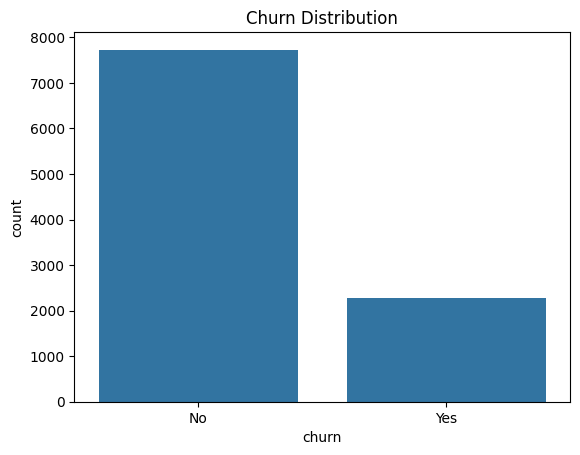

Churn Rate (%):
 churn
No     77.28
Yes    22.72
Name: proportion, dtype: float64


In [11]:
sns.countplot(data=df, x='churn')
plt.title("Churn Distribution")
plt.show()

churn_rate = df['churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)

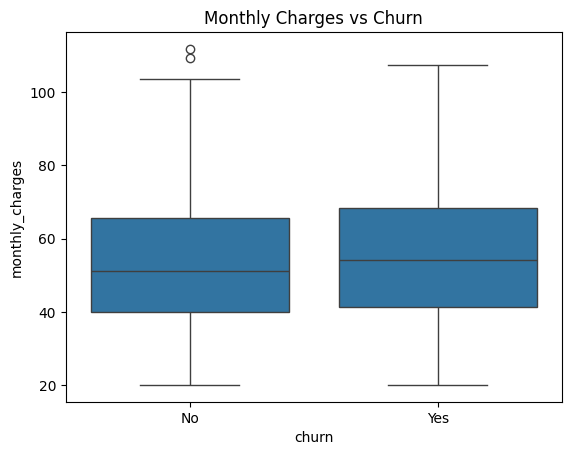

In [12]:
sns.boxplot(data=df, x='churn', y='tenure')
plt.title("Tenure vs Churn")
plt.show()

sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title("Monthly Charges vs Churn")
plt.show()

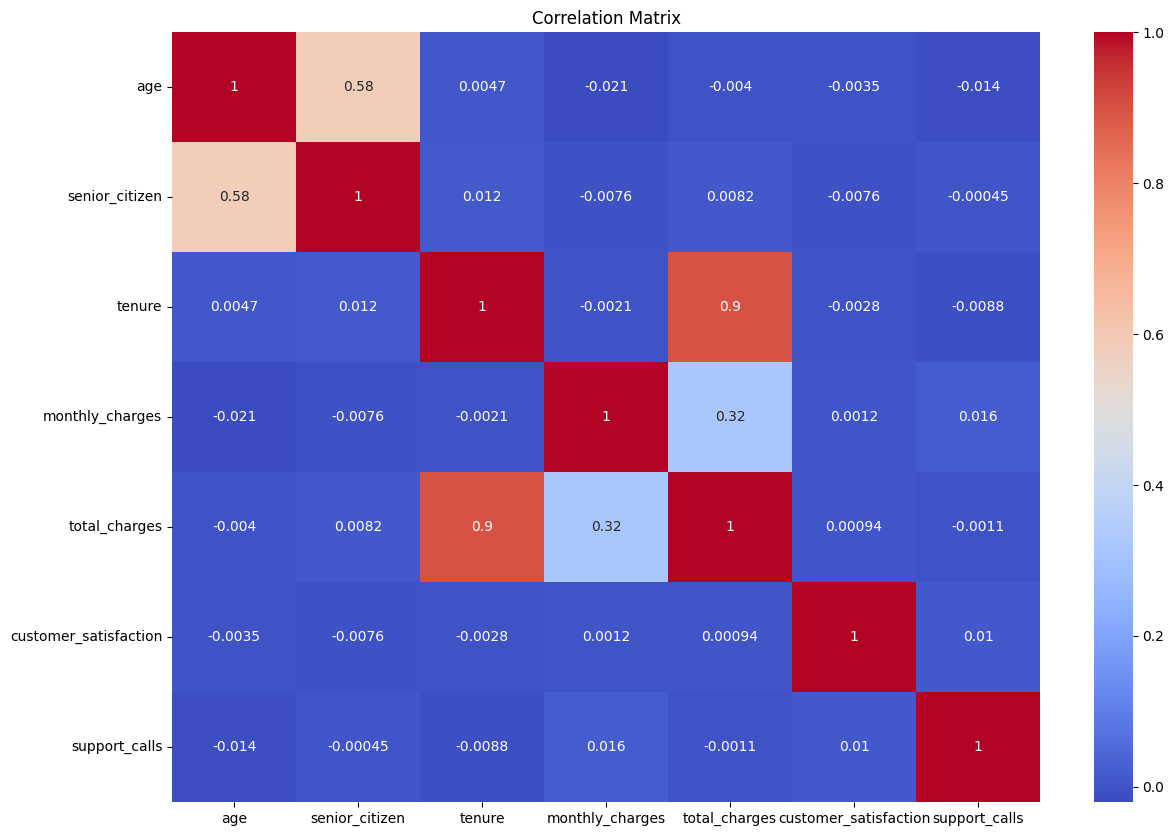

In [13]:
# Only numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [14]:
label_enc = LabelEncoder()

# Encode target
df['churn'] = label_enc.fit_transform(df['churn'])  # Yes/No → 1/0

# Encode other categoricals
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

In [15]:
scaler = StandardScaler()

X = df.drop('churn', axis=1)
y = df['churn']

X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1546
           1       0.62      0.19      0.29       454

    accuracy                           0.79      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.76      0.79      0.74      2000




Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1546
           1       0.35      0.40      0.37       454

    accuracy                           0.70      2000
   macro avg       0.58      0.59      0.59      2000
weighted avg       0.71      0.70      0.70      2000



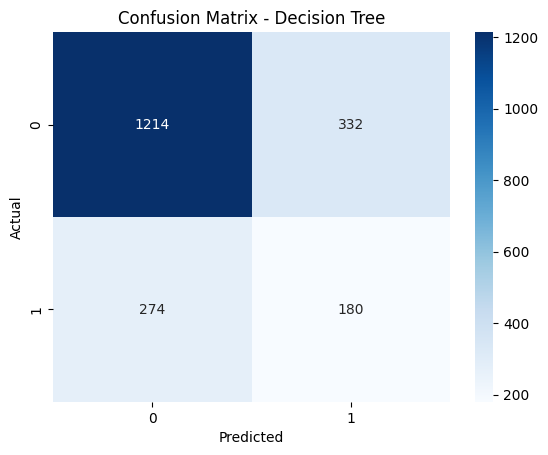


Random Forest
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1546
           1       0.61      0.22      0.32       454

    accuracy                           0.79      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.76      0.79      0.75      2000




SVM
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1546
           1       0.56      0.09      0.15       454

    accuracy                           0.78      2000
   macro avg       0.67      0.53      0.51      2000
weighted avg       0.73      0.78      0.71      2000



In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()